## Time Series Stationary Research on Dividend Growth Rate 
## Project Instruction

### Data Background: 
Based on real monthly dividends & return history for one company from 1946 to 2020, we set the start point price on Jan-1946 as 1 to simplify the computation. Column "vwretd" refers to return rate with dividend, while 'vwretx' is the return rate excluding dividend. Hence, we have 'DivYield' as 'vwretd' minus 'vmretx'. 

### Methods:
We fisrt compute the monthly continuous Div growth rate and its mean & std. Then we plot the growht rate time series to see the pattern.
Then we aggregate the monthly Div to get annual Div, and then apply log-diff to get the aggregated yearly growth rate. Repeat the plotting step.

### As we plot the two growth rate time series in one figure, we come to the below conclusion:

If we aggregate the monthly data to get the annual dividends first, and then distribute annual growth rates evenly into 12 months every year,the sample std will be much smaller than the previous monthly std.
That is, as we aggregate first, and distribute annual growth evenly into 12 months, we are making the time series more stationary with a smaller std. However, we will lose a lot info while enhancing the stationariness.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel("dividends.xlsx")

In [5]:
data.head()

,time,vwretd,vwretx,DivYield,Price,Div
0,19460131,0.069504,0.068515,0.000989,1.000000,NaN
1,19460228,-0.065171,-0.069785,0.004614,0.930215,0.004614
2,19460330,0.049118,0.046147,0.002971,0.973142,0.002764
3,19460430,0.035748,0.034707,0.001041,1.006916,0.001013
4,19460531,0.028785,0.023202,0.005583,1.030279,0.005622


### 1. Compute log dividend growth rate

In [6]:
div_rate = data.loc[:,"Div"].tolist()
div_rate_in_range = div_rate[12:len(div_rate)] 
# We look into Div growth starting from the 13rd records which was Jan-1947

div_rate_in_range

[0.0008646262641954317,
 0.005712011996624749,
 0.0022332584348401167,
 0.000976392420783237,
 0.00732574781893482,
 0.002357469687623538,
 0.0009667249291731258,
 0.005066648400779722,
 0.003047620073826591,
 0.0009787945879570663,
 0.00971022277048441,
 0.004355935233959621,
 0.000941665482910207,
 0.005880358351202024,
 0.0032765661452288613,
 0.0018243741175707308,
 0.005332726753471603,
 0.003521511004817919,
 0.0007534569139962231,
 0.006239017831853011,
 0.003513783201084666,
 0.0024798863241882753,
 0.010176684332548504,
 0.004864108096280672,
 0.001043840079850386,
 0.00791240426685717,
 0.0035726936971277085,
 0.0024024745939399184,
 0.006500218488133257,
 0.0037464596085735476,
 0.0008007736613847152,
 0.007957375573911364,
 0.0024979658928143862,
 0.0011006616200473322,
 0.017072974490821843,
 0.004174168549536228,
 0.0012860803643206945,
 0.008647666874256573,
 0.004211843029934833,
 0.001269029799883249,
 0.008854367590150045,
 0.003576418797895853,
 0.0010280541685029388

In [13]:
log_div = np.diff(np.log(div_rate_in_range))
# Here we computed the continuous growth rate with log-diff method

### Plot log dividend growth rate

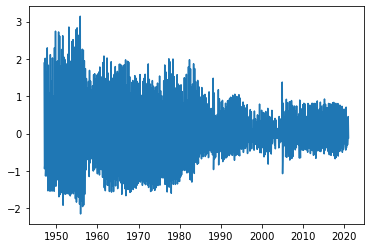

In [8]:
time  = np.linspace(1947+1/12,2021,len(log_div))
# We divide the entire time period from Jan-1947 to Dec-2020 into even intervals which was originally stored as text in the spreadsheet
plt.plot(time,log_div)

### 2. Compute sample average and std of log dividend growth rate

In [9]:
avg = np.mean(log_div)
stddev = np.std(log_div)
avg, stddev

(0.006514637662091675, 0.9929802612630331)

### 3. Discuss the time series properties of monthly delta (log div growth rate)
1. The delta (dt) between 1947:M1 and 2020:M12 seems to be stationary with mean reversion around 0 and asymmetric fluctuation around x-axis
2. There is no clear pattern of changes that depend on the time
3. We also observe fluctuation clustering, that is, large fluctuation is often followed by large ones, vice versa

Summary of 1-3: per the performance above and the defination of stationary, we conclude that the montly Div growth rate for this company is a stationary time series.

4. However, we are able to tell that the growth rates had higher deviation prior to 1985 comparing to those afterwards


### 4. Aggregate & Compute annual log dividend growth rates

In [18]:
Div = div_rate
div_rate = data.loc[:,"Div"].tolist()

nT = len(Div)
nTA    = nT//12
# Here we count the # of months and years in our sample

DivA   = np.zeros((nTA,1))
for tt in range(nTA):
    DivA[tt] = sum(Div[12*(tt):12*(tt+1)])
    # Python starts from 0 indexing, and includes the start point while excludes the ending points
    
DivA_squeeze = np.squeeze(DivA,axis=1)
log_DivA = np.diff(np.log(DivA_squeeze))
# Same log-diff method as above to get the continuous annual growth rate

log_DivA

array([        nan,  0.11286227,  0.18602075,  0.26809496, -0.0396194 ,
        0.02292565,  0.01826599,  0.063575  ,  0.13299497,  0.04913017,
        0.04314137, -0.08702872,  0.04684083,  0.03199432,  0.03810619,
        0.05627005,  0.06661962,  0.08557596,  0.09142318,  0.0475569 ,
        0.01579405,  0.0567686 ,  0.05207161, -0.03742729, -0.011891  ,
        0.02723588,  0.063622  ,  0.06372183,  0.0161478 ,  0.10163216,
        0.12450639,  0.09364675,  0.11184205,  0.08485228,  0.07627295,
        0.03375537,  0.03950061,  0.05479266,  0.05527726,  0.10198153,
        0.09072288,  0.17797054,  0.009673  ,  0.02540204,  0.01028157,
        0.01676137,  0.03245478,  0.03119438,  0.04509716,  0.08247945,
        0.03957413,  0.04701103,  0.06310593, -0.05156652, -0.03284424,
        0.03048472,  0.0886178 ,  0.28202982, -0.04003138,  0.11497549,
        0.11660058,  0.01030068, -0.17646756,  0.02817278,  0.09346932,
        0.19622356,  0.08234363,  0.12975206,  0.09607386,  0.05

In [19]:
avg = np.nanmean(log_DivA)  # We use np.nanmean to exclude "nan" items
stddev = np.nanstd(log_DivA)
avg, stddev

(0.058661945903392604, 0.06847522421930738)

### 5. Plot annual log dividend growth rate & Compare to previous monthly log dividend growth rate

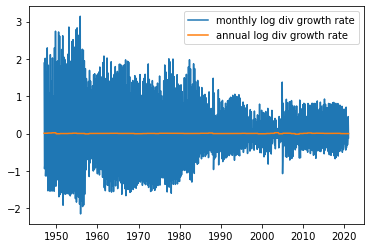

In [21]:
log_DivA_distribute  = np.zeros((nT,1))
for tt in range(nTA-1):
    log_DivA_distribute[12*(tt):12*(tt+1)] =(log_DivA[tt]/12) 
    # We distribute the annual log dividend growth rate evenly into 12 months so that we can 
    # plot against the same intervals as above (monthly)


time = np.linspace(1947+1/12,2021,len(log_div))
plt.plot(time,log_div,label="monthly log div growth rate")
plt.plot(time,log_DivA_distribute[13:],label="annual log div growth rate")
plt.legend()


### Discuss sample std of "monthly" & "annual" log div growth rate

In [13]:
A_distribute_std = stddev/12  # Compute the sample std of evenly distributed time series
A_distribute_std

0.005706268684942281

Aggregation first - Evenly distributed into 12 months std: 0.005706

Monthly std: 0.992980

If we aggregate the monthly data to get the annual dividends first, and then distribute annual growth rates evenly into 12 months every year,the sample std will be much smaller than the previous monthly std.
That is, as we aggregate first, and distribute annual growth evenly into 12 months, we are making the time series more stationary with a smaller std. However, we will lose a lot info while enhancing the stationariness.